# Machine Learning
---
### Lecture 3: Linear Regression

In [5]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 6)

## Learning Outcomes

* Derive and analyse Closed-form solution of Linear Regresssion
* Understand and derive propertied of L1 and L2 regularization
* Understand the concept of overfitting, validation and cross validation

# Multivariate Linear Regression
--- 


<table><tr>
<td> <img src="img/3_1.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

#### Training Dataset:

$$
\mathcal{D} = \{x_n, y_n\}_{n=1}^N
$$

#### Model:

$$
a(x_n) = w_1 + w_2 x_{n,1} + \dots + w_d x_{n,d-1} 
$$

Let's add constant feature $x_{n, 1} = 1$ to each object

$$
a(x_n) = w_1 x_{n,1} + w_2 x_{n,2} + \dots + w_d x_{n,d} =  \langle w, x_n\rangle
$$


#### Cost function:

$$
\mathcal{L}(a, X) = \frac{1}{N}\sum_{n=1}^N\left(a(x_n) - y_n \right)^2
$$

## Matrix Form

#### Training Dataset:

$$
X = 
\begin{bmatrix}
x_{11}& \cdots& x_{1d} \\
\vdots&&\vdots\\
x_{N1}& \cdots& x_{Nd} \\
\end{bmatrix} \in \mathbb{R}^{N \times d}; \quad
y = 
\begin{bmatrix}
y_{1} \\
\vdots\\
y_{N} \\
\end{bmatrix} \in \mathbb{R}^{N}
$$

#### Model:
Prediction for 1 object:

$$
a(x) = \langle w, x_n\rangle = x_n^T w
$$ 
Prediction for the whole dataset:

$$
a(X) = Xw
$$

#### Training Dataset: $ \quad X \in \mathbb{R}^{N \times d}; \quad
y \in \mathbb{R}^{N}$

#### Model: $\quad \quad  \quad \quad  a(X) = Xw$

#### Cost function: $\quad  \quad \mathcal{L}(a, X) = \frac{1}{N}\sum_{n=1}^N\left(a(x_n) - y_n \right)^2$

- Model Errors: $ \quad\quad Xw - y  = \begin{bmatrix} x_1^T w -  y_{1} \\ 
\vdots\\
x_n^T w -  y_{n} \\
\end{bmatrix} \in \mathbb{R}^{N}$
- Euclidean norm:     $\quad \|a\|^2_2 = \sum_i a_i^2$

$$
\mathcal{L}(a, X) = \frac{1}{N} \|Xw - y\|^2
$$

## Multivariate Linear Regression
#### Training Dataset:  $\quad X \in \mathbb{R}^{N \times d}; \quad y \in \mathbb{R}^{N}$

#### Model: $\quad \quad  \quad \quad  a(X) = Xw$

#### Cost function: $\quad  \quad \mathcal{L}(a, X) = \frac{1}{N} \|Xw - y\|^2$

#### Training:
$$
\frac{1}{N} \|Xw - y\|^2 \rightarrow \min_w
$$

## Multivariate LR: analytical solution

\begin{align}
\nabla_w \mathcal{L} &=0 \\
\nabla_w \mathcal{L} &= \frac{2}{N}X^T(Xw - y) \\
&= \frac{2}{N}(X^TXw - X^Ty) = 0 \\
w^* &= (X^TX)^{-1}X^Ty
\end{align}

### What could possibly go wrong?
#### Training Dataset: $ \quad X \in \mathbb{R}^{N \times d}; \quad
y \in \mathbb{R}^{N}$

#### Model: $\quad \quad  \quad \quad  a(X) = Xw$

#### Optimal Parameters: $\quad w^* = (X^TX)^{-1}X^Ty $

* $X^TX \in \mathbb{R}^{d\times d}$
* Inversion is O($d^3$) 
* $X^TX$ can be degenerate: 
    - We have linearly dependent features. Inverse does not exist
* or ill-conditioned:
    - We have highly correlated featueres. Approximate inverse may be very inaccurate

### Solution

**A. Use gradient descent** (see prev. lecture)
- Does not require inversion

**B. Add L-2 Regularization** (later today)
- Makes inversion more stable

# Overfitting
--- 


In [6]:
from sklearn.linear_model import LinearRegression

# Generate data
fun = lambda x: 0.1 + 0.2*x + 0.05*x**2 - 0.05*x**3
N = 25
np.random.seed(6)
x = np.random.uniform(-8, 6, N) + np.random.randn(N)*2
y = fun(x) + np.random.randn(N)*2
x_grid = np.arange(min(x)-0.1, max(x)+0.1, 0.01)

# plot
def plot_real_fun(ax):
    ax.plot(x_grid, fun(x_grid), label='True function', c='coral')
    ax.scatter(x, y, label = 'Observed Data', c='royalblue')
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.grid()

# fit and plot polynomial lr
def make_pow(x, p = 4):
    X = [x**i for i in range(1, p+1)]
    return(np.stack(X, axis=1))

def plot_poly_reg(x, y, P, c='seagreen', name='Model', linestyle='-', ax=None):
    lr = LinearRegression().fit(make_pow(x, P), y)
    ax.plot(x_grid, lr.predict(make_pow(x_grid, P)), 
            label=name, c=c,linestyle=linestyle)
    return lr

### 1-d example 

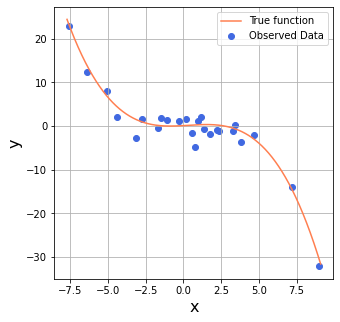

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5)) 

plot_real_fun(ax)
ax.legend();

### Fit Linear Regression

$$
a(x) = w_1 + w_2x
$$

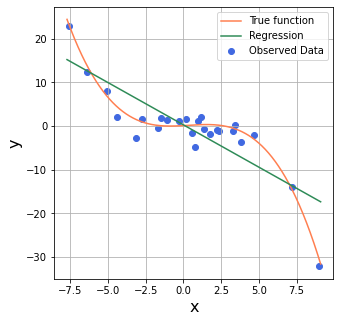

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))

plot_real_fun(ax)
plot_poly_reg(x, y, 1, name='Regression', ax=ax)
ax.legend();

### Add Polynomial Features

$$
a(x) = w_1 + w_2x + w_3x^2 + w_4x^3 + w_5x^4
$$

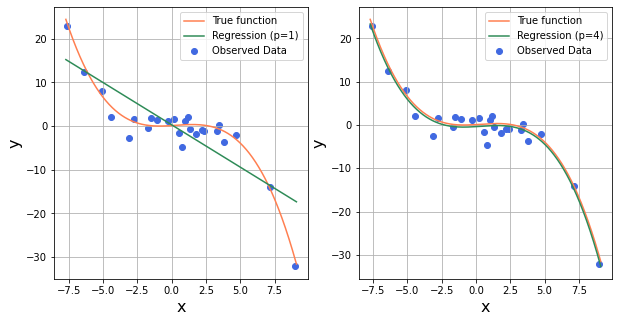

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

for i, p in enumerate([1, 4]):
    plot_real_fun(ax[i])
    plot_poly_reg(x, y, p, name='Regression (p={})'.format(p), ax=ax[i])
    ax[i].legend()

### Add More Polynomial Features

$$
a(x) = w_1 + w_2x + w_3x^2 + w_4x^3 + w_5x^4 +  w_6x^5 +  w_7x^6 + \dots
$$

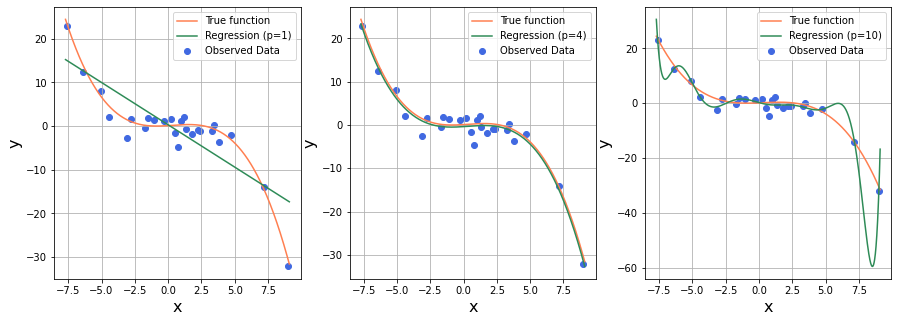

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5)) 

for i, p in enumerate([1, 4, 10]):
    plot_real_fun(ax[i])
    plot_poly_reg(x, y, p, na me='Regression (p={})'.format(p), ax=ax[i])
    ax[i].legend()

### Let's compute value of cost function

In [11]:
def compute_mse(x, y, P, lr):
    x_tr = make_pow(x, P)
    return np.mean( (y - lr.predict(x_tr))**2 )

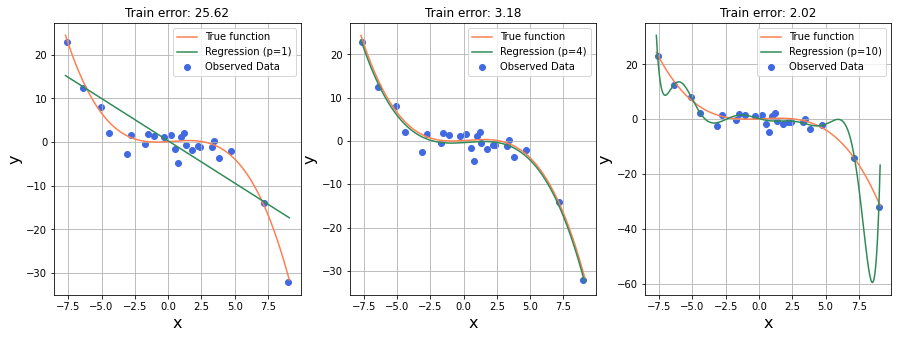

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5)) 

for i, p in enumerate([1, 4, 10]):
    plot_real_fun(ax[i])
    lr = plot_poly_reg(x, y, p, name='Regression (p={})'.format(p), ax=ax[i])
    ax[i].set_title('Train error: {:.2f}'.format(compute_mse(x, y, p, lr)))
    ax[i].legend()

In [13]:
# generate new data
N = 12
x_new = x[-N:] + abs(np.random.randn(N))
y_new = fun(x_new) + np.random.randn(N)*3

### Consider new points from the same distribution

We can calculate value of cost function on these points instead. 

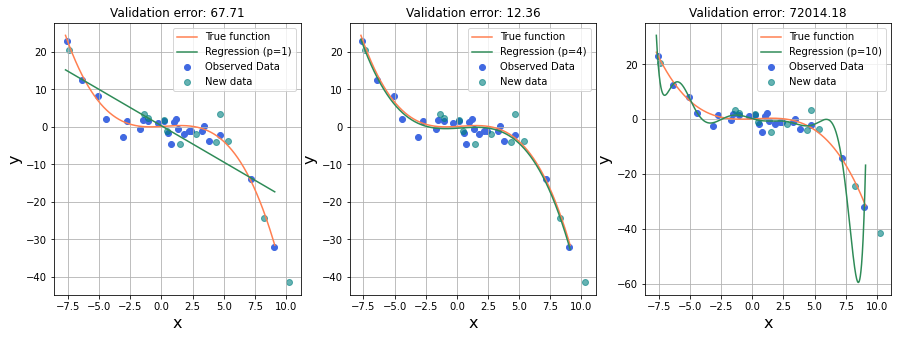

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5)) 

for i, p in enumerate([1, 4, 10]):
    plot_real_fun(ax[i])
    lr = plot_poly_reg(x, y, p, name='Regression (p={})'.format(p), ax=ax[i])
    ax[i].set_title('Validation error: {:.2f}'.format(compute_mse(x_new, y_new, p, lr)))
    ax[i].scatter(x_new, y_new, label='New data', c='teal', alpha=0.6)
    ax[i].legend()

### Train and test errors behave differently, when model complexity increases

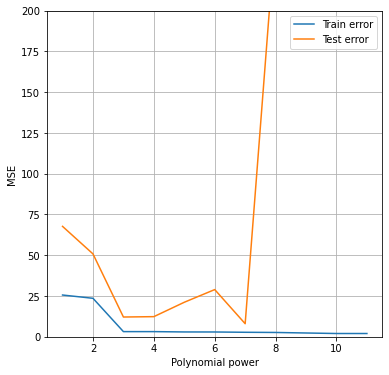

In [15]:
train = []
test = []
P_max = 11
for p in range(1, P_max+1):
    lr = LinearRegression().fit(make_pow(x, p), y)
    train.append(compute_mse(x, y, p, lr))
    test.append(compute_mse(x_new, y_new, p, lr))
    
plt.plot(range(1, P_max+1), train, label='Train error')
plt.plot(range(1, P_max+1), test, label='Test error')
plt.xlabel('Polynomial power')
plt.ylabel('MSE')
plt.legend()
plt.ylim((0, 200))
plt.grid();

### Validation 

On practice test is a holdout data. We cannot try every model on it. 

- We use validation instead. 
- Hope that the best model on validation will also be best on test

In [16]:
N_tr = int(x.shape[0]*0.7)
idx = np.random.permutation(x.shape[0])

x_train, x_val = x[idx[:N_tr]], x[idx[N_tr: ]]
y_train, y_val = y[idx[:N_tr]], y[idx[N_tr: ]]

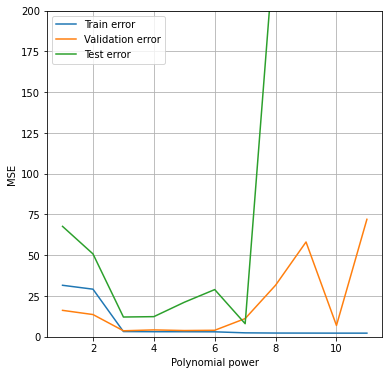

In [17]:
train = []
validation = []
for p in range(1, P_max+1):
    lr = LinearRegression().fit(make_pow(x_train, p), y_train)
    train.append(compute_mse(x_train, y_train, p, lr))
    validation.append(compute_mse(x_val, y_val, p, lr))
    
plt.plot(range(1, P_max+1), train, label='Train error')
plt.plot(range(1, P_max+1), validation, label='Validation error')
plt.plot(range(1, P_max+1), test, label='Test error')
plt.xlabel('Polynomial power')
plt.ylabel('MSE')
plt.legend()
plt.ylim((0, 200))
plt.grid();

# Regularization
--- 

In the previous example we knew, how to tune complexity. 

We could tune the poly power

- What if we have 100500 features and model overfits? 
- Which feature to remove?
- What if dependency is non linear on top of that?


## Penatly on weights

$$
\min_w\mathcal{L}(w)  \;\Rightarrow  \;\min_w\left[\mathcal{L}(w) + \lambda R(w)\right]
$$

* $R(w)$ - regularizer
* $\lambda > 0$ - regularization coefficient


Note that this concept goes beyond linear regression. You can add regularization to any model. But today we are talking about linear regression

* $L_1$ and $L_2$ norms are the most popular regularizers

    - $\|w\|_1 = \sum_i |w_i|$
    
    - $\|w\|_2^2 = \sum_i w_i^2$

* When coupled with MSE loss they give:
    - Ridge regression: $\|Xw-y\|_2^2 + \lambda \|w\|_2^2$
    - Lasso regression: $\|Xw-y\|_2^2 + \lambda \|w\|_1$

### L2 Regularization
- aka Tikhonov regularization $\quad$ (if you want to show off)
- aka Ridge regression $\quad \quad \quad$ (if you are machine learner)
- aka Weight decay $\quad \quad \quad \quad \;$(if you are deep learner)
- aka Gaussian prior$\quad \quad \quad \quad $ (if you are bayesian)

### Ridge regression: Closed-form solution

\begin{align}
f(w) &= \|Xw - y\|^2 + \lambda \|w\|^2
\end{align}

\begin{align}
\nabla f(w) &= 2X^T(Xw-y) + 2 \lambda w = 0 \\
(X^TX + \lambda I)w &= X^Ty\\
w^* &= (X^TX + \lambda I)^{-1}X^Ty
\end{align}

* Inversion of $X^TX + \lambda I$ is more stable

### Ridge regression: Shrinkage

* Let's assume that features are orthogonal:
$$ X^TX = I $$
 
* Solution of unregularized linear regression will then be:
$$ w^{OLS} = (X^TX)^{-1}X^Ty = X^Ty $$

* Ridge Solution

$$ w^{R} = \frac{w^{OLS}}{1 + \lambda} $$

In [18]:
from sklearn.linear_model import Lasso, Ridge
from sklearn import datasets
import pandas as pd

data = datasets.load_diabetes()
X, y = data['data'], data['target']

def plot_model_coef(model, ax):
    ax.bar(np.arange(1, 11), model.coef_, alpha=0.5)
    ax.grid()
    ax.set_xticks(np.arange(1, 11))
    ax.set_xticklabels(data['feature_names'], fontsize=22, rotation=45)
    ax.set_yticks([0])
    ax.set_yticklabels('0', fontsize=20)

### Example: Predict diabetes progression
* 10 Numerical features
* Let's train Ridge with different values of $\lambda$ and plot the resulting weights $w$

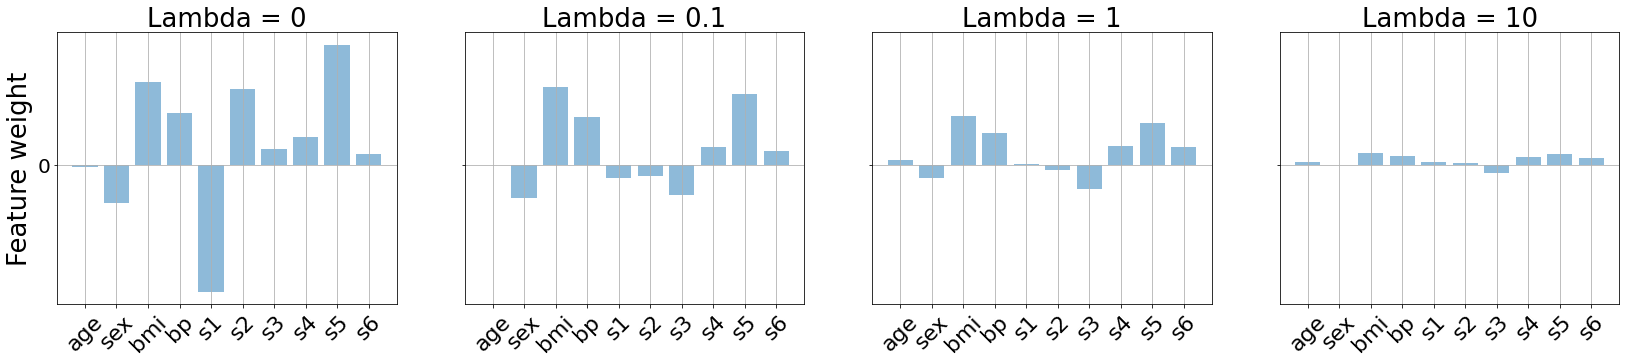

In [19]:
vals = [0, 0.1, 1, 10]
fig, ax = plt.subplots(ncols=len(vals), figsize=(7*len(vals),5), sharey=True)

for i, lbd in enumerate(vals):
    ridge = Ridge(alpha=lbd).fit(X, y)
    plot_model_coef(ridge, ax[i])
    ax[i].set_title('Lambda = {}'.format(lbd), fontsize=26)
    
ax[0].set_ylabel('Feature weight', fontsize=26);

### L1 Regularization
* aka **Lasso** - Least Absolute Shrinkage and Selection Operator

\begin{align}
f(w) &= \|Xw - y\|^2_2 + \lambda \|w\|_1
\end{align}

### Orthogonal Features
$$
X^TX = I \\
w^{OLS} = X^Ty
$$

\begin{align}
\min_w (Xw - y)^T(Xw - y) + \lambda \|w\|_1 =\\
\min_w w^T w - 2 w^T w^{OLS} + \lambda \|w\|_1 =\\
\min_w \sum_{i=1}^d \left[ w_i^2 - 2 w_i w^{OLS}_i + \lambda |w_i| \right]
\end{align}

* We can optimize each component separately. 
* Cosider 2 cases: $w_i \geq 0$ and $w_i < 0$

* $w_i \geq 0$
\begin{align}
\min_{w_i} \left[ w_i^2 - 2 w_i w^{OLS}_i + \lambda w_i\right] = \\
\min_{w_i} \left[w_i(w_i - 2 w^{OLS}_i + \lambda) \right]\\
\end{align}

$$
w_i^* = \begin{cases}
0, \quad \quad \quad \quad  w_i^{OLS} \leq \frac{\lambda}{2} \\
w_i^{OLS} - \frac{\lambda}{2},\quad  w_i^{OLS} > \frac{\lambda}{2}
\end{cases}
$$


* $w_i < 0$
\begin{align}
\min_{w_i} \left[ w_i^2 - 2 w_i w^{OLS}_i - \lambda w_i\right] = \\
\min_{w_i} \left[w_i(w_i - 2 w^{OLS}_i - \lambda) \right]\\
\end{align}

$$
w_i^* = \begin{cases}
0, \quad \quad \quad \quad w_i^{OLS} \geq  - \frac{\lambda}{2} \\
w_i^{OLS} + \frac{\lambda}{2},\quad  w_i^{OLS} < -\frac{\lambda}{2}
\end{cases}
$$

* And all together:
$$
w_i^* = \begin{cases}
0, \quad \quad \quad \quad w_i^{OLS} \in \left[  - \frac{\lambda}{2} , \frac{\lambda}{2} \right]\\
w_i^{OLS} + \frac{\lambda}{2},\quad  w_i^{OLS} < -\frac{\lambda}{2}\\
w_i^{OLS} - \frac{\lambda}{2},\quad  w_i^{OLS} > \frac{\lambda}{2}
\end{cases}
$$

### Non-orthogonal features. Proximal Update.
* Our objective has two parts:
    - Convex $f$
    - Non-convex, but sowhat simple $g$
$$
\mathcal{w} = f(w) + g(w)
$$

* On each iteration we find $w$, s.t.:

\begin{align}
w^{k+1} = \arg \min_w \left[\|w - (w^k - \alpha \nabla f(w^k))\|^2 + g(w)\right]
\end{align}

* If g(w) = 0 we have gradient descent. 

### Non-orthogonal features. Proximal Update.

* Rename $a(w^k) = w^k - \alpha \nabla f(w^k)$. 

* The step is:
\begin{align}
w^{k+1} = &\arg \min_w \left[\|w - a(w^k)\|^2 + \lambda \|w\|_1\right] = \\
&\arg \min_w \left[w^Tw - 2w^Ta(w^k) + a(w^k)^T a(w^k) + \lambda \|w\|_1\right] = \\
&\arg \min_w \sum_i \left[w_1^2 - 2w_1a(w^k)_i + \lambda |w_i|\right] 
\end{align}

* That's exactly the same objective we had in orthogonal case. 

$$
w^{k+1} = \begin{cases}
0, \quad \quad \quad \quad a(w^k)_i \in \left[  - \frac{\lambda}{2} , \frac{\lambda}{2} \right]\\
a(w^k)_i + \frac{\lambda}{2},\quad  a(w^k)_i < -\frac{\lambda}{2}\\
a(w^k)_i - \frac{\lambda}{2},\quad  a(w^k)_i > \frac{\lambda}{2}
\end{cases}
$$

### Non-orthogonal features. Proximal Update.


$$
w^{k+1} = \begin{cases}
0, \quad \quad \quad \quad a(w^k)_i \in \left[  - \frac{\lambda}{2} , \frac{\lambda}{2} \right]\\
a(w^k)_i + \frac{\lambda}{2},\quad  a(w^k)_i < -\frac{\lambda}{2}\\
a(w^k)_i - \frac{\lambda}{2},\quad  a(w^k)_i > \frac{\lambda}{2}
\end{cases} \\
\text{where  } a(w^k) = w^k - \alpha \nabla f(w^k)
$$


* We make gradient step + shrinkage on each iteration
* If we get inside $\left[  - \frac{\lambda}{2} , \frac{\lambda}{2} \right]$ after the gradient step, we set corresponding component to 0

### Example: Predict diabetes progression
* 10 Numerical features
* Let's train Ridge with different values of $\lambda$ and plot the resulting weights $w$

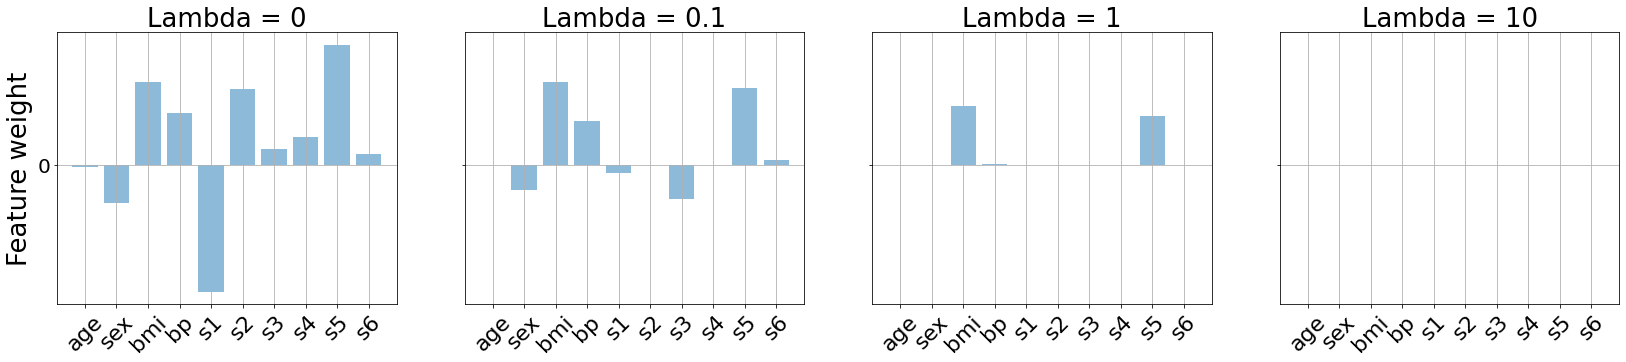

In [20]:
vals = [0, 0.1, 1, 10]
fig, ax = plt.subplots(ncols=len(vals), figsize=(7*len(vals),5), sharey=True)

for i, lbd in enumerate(vals):
    ridge = Lasso(alpha=lbd).fit(X, y)
    plot_model_coef(ridge, ax[i])
    ax[i].set_title('Lambda = {}'.format(lbd), fontsize=26)
    
ax[0].set_ylabel('Feature weight', fontsize=26);

# Validation and Cross-Validation
--- 

<table><tr>
<td> <img src="img/3_2.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

<table><tr>
<td> <img src="img/3_3.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

### How to choose good validation set?

In [21]:
# Generate data
fun = lambda x: 0.1 + 0.2*x + 0.05*x**2 - 0.05*x**3
N = 25
np.random.seed(6)
x = np.random.uniform(-8, 6, N) + np.random.randn(N)*2
y = fun(x) + np.random.randn(N)*2
x_grid = np.arange(min(x)-0.1, max(x)+0.1, 0.01)


x_train = x[x<0]
y_train = y[x<0]

x_val = x[x>0]
y_val = y[x>0]
# plot
def plot_fun(ax):
    ax.plot(x_grid, fun(x_grid), label='True function', c='coral')
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.grid()

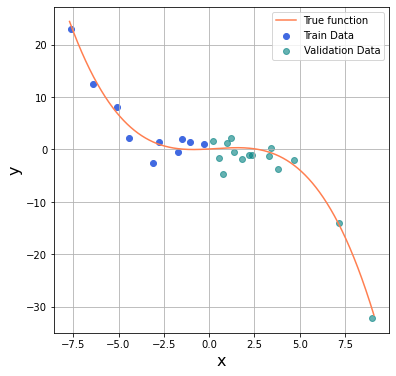

In [22]:
fig, ax = plt.subplots(ncols=1)
plot_fun(ax)
ax.scatter(x_train, y_train, label = 'Train Data', c='royalblue')
ax.scatter(x_val, y_val, label = 'Validation Data', c='teal', alpha=0.6)
ax.legend();

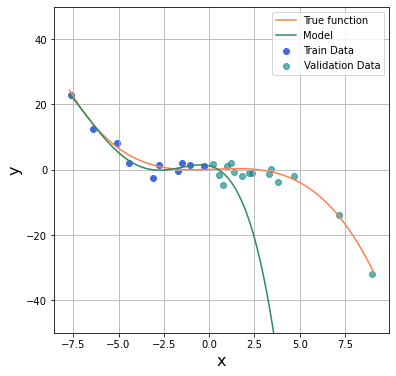

In [23]:
fig, ax = plt.subplots(ncols=1)
plot_fun(ax)
ax.scatter(x_train, y_train, label = 'Train Data', c='royalblue')
ax.scatter(x_val, y_val, label = 'Validation Data', c='teal', alpha=0.6)
lr = plot_poly_reg(x_train, y_train, 4, name='Model', ax=ax)
ax.set_ylim((-50, 50))
ax.legend();

### Best validation - the whole training dataset
<table><tr>
<td> <img src="img/3_4.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

### K-Fold Cross Validation
<table><tr>
<td> <img src="img/3_5.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

### K-Fold Cross Validation
<table><tr>
<td> <img src="img/3_6.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

### K-Fold Cross Validation
<table><tr>
<td> <img src="img/3_7.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

### K-Fold Cross Validation
<table><tr>
<td> <img src="img/3_8.png" alt="Drawing" style="width: 1000px;"/> </td>
</tr></table>

$$
MSE_{KFold} = \frac{1}{K}\sum_i MSE_{i}
$$

### K-Fold Cross Validation

* Split dataset into K parts
* For each model:
    * Compute cost on K validation parts
    * Average
* Select best model based on CV 

#### Properties
* K folds = K fits of the model (mind the compexity)
* If K is small, folds might be too large (mind the quality)
* K = N:
    - LOOCV (Leave-One-Out-Cross-Validation)
    - There is a short formula for linear regression:
    $$
    MSE_{LOOCV} = \frac{1}{N} \sum_n \left[ \frac{y_n - x_n^Tw}{1 - x_n^T (X^TX)^{-1}x_n} \right]^2
    $$

## Learning Outcomes

* Derive and analyse Closed-form solution of Linear Regresssion
* Understand and derive propertied of L1 and L2 regularization
* Understand the concept of overfitting, validation and cross validation